In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('../light_mode.mplstyle')

import sys
sys.path.append('../src/')

from sim import Init, Grid
import constants
from helper import *

### Set up physical units

In [2]:
Nside     = 256
boxsize   = 1
Ndot      = 1e10
c_red     = constants.c
time_sim  = 5.2e-11


unit = SimpleNamespace(
    length = boxsize,
    time   = 1.,
    phot   = 1
)
unit.vel = unit.length/unit.time

### Run the Simulation

In [3]:
grid = Grid(N=Nside, C=0.4, bc_typ=[NEU, NEU], do_hydro=False, do_thermo=False, c_red=c_red/unit.vel)

with Init(grid) as grid:
    grid.urad[NPHOT] = 1e-13

for i in range(1000):
    
    grid.inject([0.5, 0.5], Ndot/(grid.dx)**2)
    grid.step(unit)

### Plot

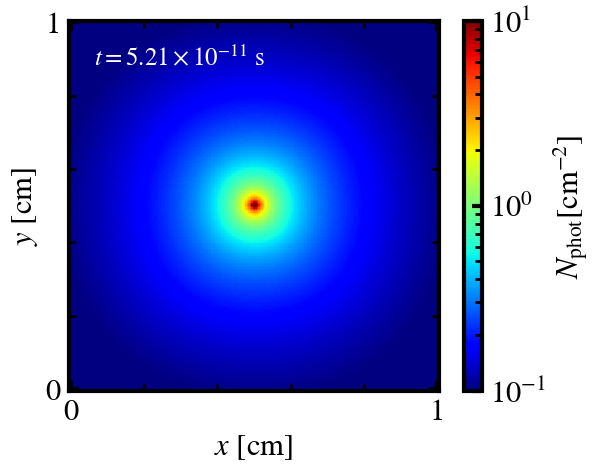

In [4]:
def fmt(x, pos):
    a, b = '{:.0e}'.format(x).split('e')
    b = int(b)
    return r'$10^{{{}}}$'.format(b)

def fmt2(x):
    a, b = '{:.2e}'.format(x).split('e')
    b = int(b)
    return r'{} \times 10^{{{}}}'.format(a, b)

plt.pcolormesh(grid.x*unit.length, grid.y*unit.length, grid.urad[NPHOT], 
               cmap='jet', norm=mpl.colors.LogNorm(vmin=1e-1, vmax=1e1))
plt.gca().set_aspect(True)
cbar = plt.colorbar(format=mpl.ticker.FuncFormatter(fmt))

title = f'$t = {fmt2(grid.t*unit.time)}$ s'

plt.text(x=0.3, y=0.9, s=title, fontsize=18, ha='center', va='center',
          transform=plt.gca().transAxes, color="white")
plt.xlabel(r'$x$ [${\rm cm}$]')
plt.ylabel(r'$y$ [${\rm cm}$]')
cbar.set_label(r'$N_{\rm phot} [\rm cm ^{-2}]$')
plt.xticks(np.arange(0, 1.1, 1)) ; plt.yticks(np.arange(0., 1.1, 1))
plt.show()